In [1]:
#---------------------------------------------------------------------------
# Linear Regression
#---------------------------------------------------------------------------
import numpy as np
import numpy.random as rnd

#---------------------------------------------------------------------------
#  Normal Equation
# page 158
#---------------------------------------------------------------------------

X = 2*rnd.rand(100, 1)
y = 4 + 3*X + rnd.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('theta =\n{}\n\n'.format(theta_best))

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print('-----  Normal Equation  -----')
print('y_predict =\n{}\n\n'.format(y_predict))

theta =
[[4.04137313]
 [3.00937438]]


-----  Normal Equation  -----
y_predict =
[[ 4.04137313]
 [10.06012189]]




In [3]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
#plt.show()
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
#---------------------------------------------------------------------------
#  Parameter extimation and prediction
# page 160
#---------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
intercept = lin_reg.intercept_
slope = lin_reg.coef_
print('-----  sklern Linear Regression: Estimates Parameters  -----')
print('intercept =\n{}\n\n'.format(intercept))
print('slope =\n{}\n\n'.format(slope))

-----  sklern Linear Regression: Estimates Parameters  -----
intercept =
[4.04137313]


slope =
[[3.00937438]]




In [5]:
#---------------------------------------------------------------------------
#  Parameter extimation and prediction
# page 160
#---------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
intercept = lin_reg.intercept_
slope = lin_reg.coef_
print('-----  sklern Linear Regression: Estimates Parameters  -----')
print('intercept =\n{}\n\n'.format(intercept))
print('slope =\n{}\n\n'.format(slope))

-----  sklern Linear Regression: Estimates Parameters  -----
intercept =
[4.04137313]


slope =
[[3.00937438]]




In [6]:
y_X_new = lin_reg.predict(X_new)
print('-----  sklern Linear Regression  -----')
print('y_predict of X_new =\n{}\n\n'.format(y_X_new))

-----  sklern Linear Regression  -----
y_predict of X_new =
[[ 4.04137313]
 [10.06012189]]




In [7]:
#---------------------------------------------------------
#  Gradient Decent
#  page 166
#---------------------------------------------------------

eta = 0.1  # Learning rate
n_iterations = 1000
m = 100    # Number of parameters
delta = 0.01

theta = np.random.randn(2, 1)
#print('Initial valuese of thetas=\n{}\n\n'.format(theta))

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    #print('valuese of thetas=\n{}\n\n'.format(theta))

print('Estimated Theta by Gradient Decent=\n{}\n\n'.format(theta))

Estimated Theta by Gradient Decent=
[[4.04137313]
 [3.00937438]]




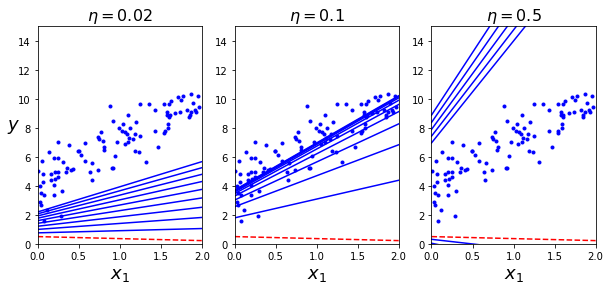



------theta_path_bgd = 
[array([[1.78913963],
       [1.29641699]]), array([[2.5571259 ],
       [2.13709241]]), array([[3.01567466],
       [2.62772261]]), array([[3.29156307],
       [2.91214444]]), array([[3.45954909],
       [3.07516012]]), array([[3.56371886],
       [3.16676413]]), array([[3.63007358],
       [3.21642789]]), array([[3.67395094],
       [3.24152224]]), array([[3.70440095],
       [3.25228354]]), array([[3.72676609],
       [3.25474171]]), array([[3.74420252],
       [3.25244667]]), array([[3.7585771 ],
       [3.24748632]]), array([[3.7709963 ],
       [3.24108668]]), array([[3.78211798],
       [3.23396579]]), array([[3.79233537],
       [3.22654236]]), array([[3.8018854 ],
       [3.21905876]]), array([[3.81091269],
       [3.21165356]]), array([[3.81950726],
       [3.2044043 ]]), array([[3.82772676],
       [3.19735267]]), array([[3.83560955],
       [3.19051938]]), array([[3.8431825 ],
       [3.18391291]]), array([[3.85046553],
       [3.17753466]]), array

In [8]:
#---------------------------------------------------------
#  서로 다른 Learning Rate에서의 Gradient Descent
# page 167
#---------------------------------------------------------

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
 m = len(X_b)
 plt.plot(X, y, "b.")
 n_iterations = 1000
 for iteration in range(n_iterations):
     if iteration < 10:
         y_predict = X_new_b.dot(theta)
         style = "b-" if iteration > 0 else "r--"
         plt.plot(X_new, y_predict, style)
     gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
     theta = theta - eta * gradients
     if theta_path is not None:
         theta_path.append(theta)
 plt.xlabel("$x_1$", fontsize=18)
 plt.axis([0, 2, 0, 15])
 plt.title(r"$\eta = {}$".format(eta), fontsize=16)

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

print('\n\n------theta_path_bgd = \n{}\n\n'.format(theta_path_bgd))

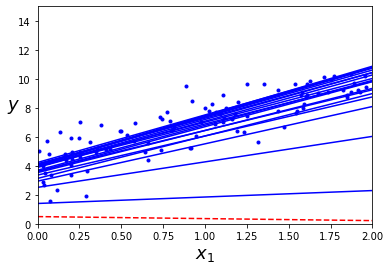

In [9]:
#---------------------------------------------------------------------------
#  Stochastic Gradient Descent
#---------------------------------------------------------------------------

theta_path_sgd = []
n_iterations = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

def learning_schedule(t):
 return t0 / (t + t1)

m = len(X_b)

for epoch in range(n_iterations):
 for i in range(m):
     if epoch == 0 and i < 20:
         y_predict = X_new_b.dot(theta)
         style = "b-" if i > 0 else "r--"
         plt.plot(X_new, y_predict, style)
     random_index = rnd.randint(m)
     xi = X_b[random_index:random_index+1]
     yi = y[random_index:random_index+1]
     gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
     eta = learning_schedule(epoch * m + i)
     theta = theta - eta * gradients
     theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
intercept_sgd = sgd_reg.intercept_
slope_sgd = sgd_reg.coef_

print('-----  sklern Linear Regression: Stochastic Gradient Decent  -----')
print('intercept_sgd =\n{}\n\n'.format(intercept_sgd))
print('slope_sgd =\n{}\n\n'.format(slope_sgd))

-----  sklern Linear Regression: Stochastic Gradient Decent  -----
intercept_sgd =
[3.98715207]


slope_sgd =
[2.96696467]




In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
intercept_sgd = sgd_reg.intercept_
slope_sgd = sgd_reg.coef_

print('-----  sklern Linear Regression: Stochastic Gradient Decent  -----')
print('intercept_sgd =\n{}\n\n'.format(intercept_sgd))
print('slope_sgd =\n{}\n\n'.format(slope_sgd))

-----  sklern Linear Regression: Stochastic Gradient Decent  -----
intercept_sgd =
[4.07172282]


slope_sgd =
[3.04251288]




No handles with labels found to put in legend.


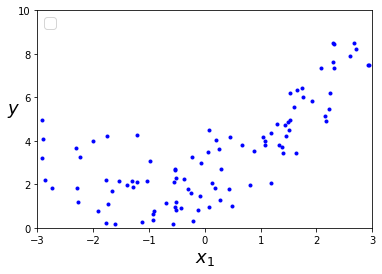

In [12]:
#---------------------------------------------------------------------------
#   Polynomial Regression
#---------------------------------------------------------------------------


m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print('\n첫번째 X={}\n첫번째 X의 Polynomial term ={}\n\n'.format(X[0], X_poly[0]))


첫번째 X=[-0.90665955]
첫번째 X의 Polynomial term =[-0.90665955  0.82203154]




In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print('\nintercept_={}\ncoef_={}\n\n'.format(lin_reg.intercept_, lin_reg.coef_))


intercept_=[2.07200787]
coef_=[[0.98499034 0.50114886]]




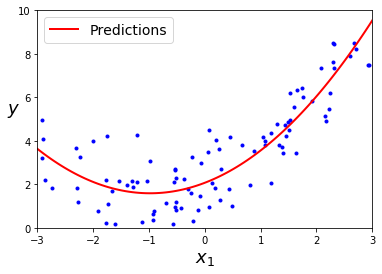

In [15]:
#---------------------------------------------------------------------------
#   Graph in Page 174
#---------------------------------------------------------------------------

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

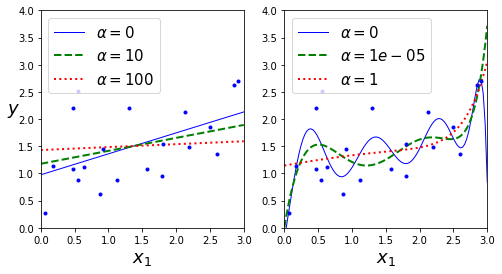

In [19]:
#---------------------------------------------------------------------------
#   Ridge Regression
#   Page 180
#---------------------------------------------------------------------------
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

rnd.seed(42)
m = 20
X = 3 * rnd.rand(m, 1)
y = 1 + 0.5 * X + rnd.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
 for alpha, style in zip(alphas, ("b-", "g--", "r:")):
     model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
     if polynomial:
         model = Pipeline((
                 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                 ("std_scaler", StandardScaler()),
                 ("regul_reg", model),
             ))
     model.fit(X, y)
     y_new_regul = model.predict(X_new)
     lw = 2 if alpha > 0 else 1
     plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
 plt.plot(X, y, "b.", linewidth=3)
 plt.legend(loc="upper left", fontsize=15)
 plt.xlabel("$x_1$", fontsize=18)
 plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))
plt.show()

In [20]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

sdg_reg = SGDRegressor(penalty='l2', random_state=42)
sdg_reg.fit(X, y.ravel())
sdg_reg.predict([[1.5]])

array([1.47012588])

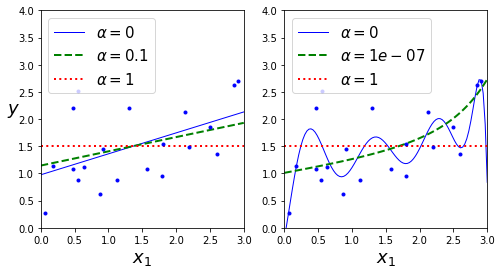

array([1.53788174])

In [21]:
#---------------------------------------------------------------------------
#   Lasso Regression
#   Page 183
#---------------------------------------------------------------------------

from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1)
plt.show()

Lasso_reg = Lasso(alpha=0.1)
Lasso_reg.fit(X, y)
Lasso_reg.predict([[1.5]])